In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

In [2]:
data = pd.read_csv(r'application_train.csv')
df = pd.DataFrame(data)
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Working with features
X = df.drop(['SK_ID_CURR'], axis=1)
Y = (df.TARGET)

#transforing from string to numerical values
le = preprocessing.LabelEncoder()
le.fit(X['NAME_CONTRACT_TYPE'])
X['NAME_CONTRACT_TYPE'] = le.transform(X['NAME_CONTRACT_TYPE'])

le.fit(X['CODE_GENDER'])
X['CODE_GENDER'] = le.transform(X['CODE_GENDER'])

le.fit(X['FLAG_OWN_CAR'])
X['FLAG_OWN_CAR'] = le.transform(X['FLAG_OWN_CAR'])

le.fit(X['FLAG_OWN_REALTY'])
X['FLAG_OWN_REALTY'] = le.transform(X['FLAG_OWN_REALTY'])

le.fit(X['NAME_TYPE_SUITE'].astype(str))
X['NAME_TYPE_SUITE'] = le.transform(X['NAME_TYPE_SUITE'].astype(str))

le.fit(X['NAME_INCOME_TYPE'])
X['NAME_INCOME_TYPE'] = le.transform(X['NAME_INCOME_TYPE'])

le.fit(X['NAME_EDUCATION_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.transform(X['NAME_EDUCATION_TYPE'])

le.fit(X['NAME_FAMILY_STATUS'])
X['NAME_FAMILY_STATUS'] = le.transform(X['NAME_FAMILY_STATUS'])

le.fit(X['NAME_HOUSING_TYPE'].astype(str))
X['NAME_HOUSING_TYPE'] = le.transform(X['NAME_HOUSING_TYPE'].astype(str))

le.fit(X['OCCUPATION_TYPE'].astype(str))
X['OCCUPATION_TYPE'] = le.transform(X['OCCUPATION_TYPE'].astype(str))
                                      
le.fit(X['WEEKDAY_APPR_PROCESS_START'])
X['WEEKDAY_APPR_PROCESS_START'] = le.transform(X['WEEKDAY_APPR_PROCESS_START'])
                                      
                                     
le.fit(X['ORGANIZATION_TYPE'])
X['ORGANIZATION_TYPE'] = le.transform(X['ORGANIZATION_TYPE'])


le.fit(X['FONDKAPREMONT_MODE'].astype(str))
X['FONDKAPREMONT_MODE'] = le.transform(X['FONDKAPREMONT_MODE'].astype(str))

le.fit(X['HOUSETYPE_MODE'].astype(str))
X['HOUSETYPE_MODE'] = le.transform(X['HOUSETYPE_MODE'].astype(str))

le.fit(X['WALLSMATERIAL_MODE'].astype(str))
X['WALLSMATERIAL_MODE'] = le.transform(X['WALLSMATERIAL_MODE'].astype(str))

le.fit(X['EMERGENCYSTATE_MODE'].astype(str))
X['EMERGENCYSTATE_MODE'] = le.transform(X['EMERGENCYSTATE_MODE'].astype(str))

X.fillna(X.mean(), inplace=True)
X = X.fillna(X.mean())

X = X.values

#X = df.loc[:, features].values
X = StandardScaler().fit_transform(X) # normalizing the features


Explained variation per principal component: [0.14643375 0.04267582 0.0408301  0.03198319 0.02652165 0.02510874
 0.02366603 0.02228785 0.02079323 0.02068482]


Text(0.5, 1.0, 'Explained Variance for 10 Principal Components')

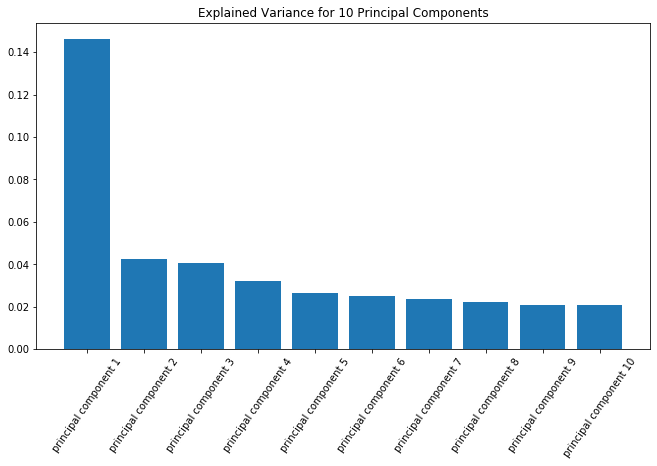

In [4]:
#PCA

pca_df = PCA(n_components=10)
principalComponents_df = pca_df.fit_transform(X)
principal_Df = pd.DataFrame(data = principalComponents_df, columns = ['principal component 1', 'principal component 2', 
                'principal component 3','principal component 4','principal component 5','principal component 6',
                'principal component 7','principal component 8','principal component 9','principal component 10' ])

print('Explained variation per principal component: {}'.format(pca_df.explained_variance_ratio_))


labels = ['principal component 1','principal component 2','principal component 3','principal component 4','principal component 5',
     'principal component 6','principal component 7','principal component 8','principal component 9','principal component 10']
plt.figure(figsize=(11,6))
plt.bar(labels,pca_df.explained_variance_ratio_)
plt.xticks(rotation = 55)
plt.title('Explained Variance for 10 Principal Components')

<Figure size 432x288 with 0 Axes>

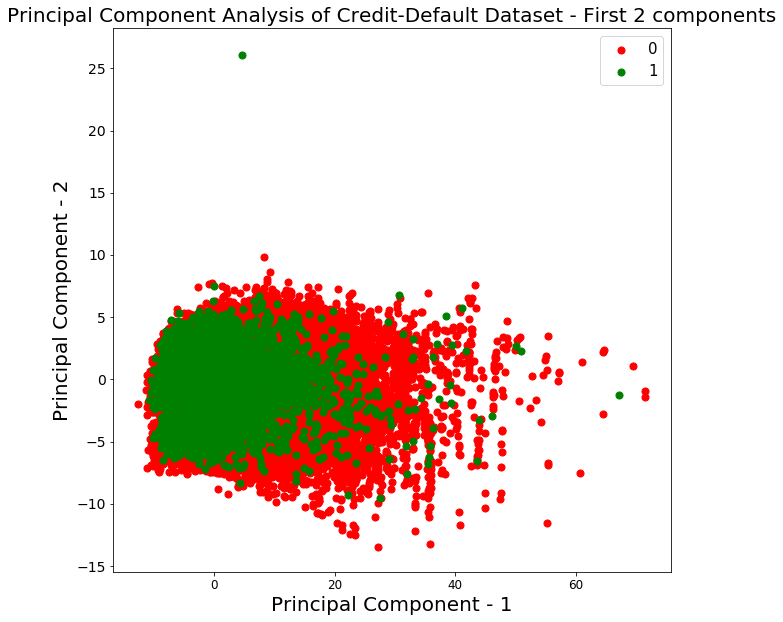

In [5]:
#Plot
rng = np.random.RandomState(0)
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Credit-Default Dataset - First 2 components",fontsize=20)
targets = [0, 1]
colors = ['r','g']
for target, color in zip(targets,colors):
    indicesToKeep = (Y == target)
    plt.scatter(principal_Df.loc[indicesToKeep,'principal component 1'],
                principal_Df.loc[indicesToKeep,'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [6]:
#Percentage of total explained variance for 10 components
total_var = pca_df.explained_variance_ratio_.sum() * 100
print(total_var)

40.09851768509321
